#Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

**Origin of this data :** Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

###The dataset consists of 5 columns.



1. culmen_length_mm: culmen length (mm)
2. culmen_depth_mm: culmen depth (mm)
3. flipper_length_mm: flipper length (mm)
4. body_mass_g: body mass (g)
5. sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: ***Adelie, Chinstrap***, and **Gentoo,** so your task is to apply your data science skills to help them identify groups in the dataset!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Loading and examining the dataset

In [ ]:
penguins_df = pd.read_csv('/content/penguins.csv')
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguins_df.shape

(344, 5)

In [ ]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


#Dealing with null values and outliers

In [ ]:
penguins_df.isna().sum()

,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,9


In [ ]:
penguins_df.dropna(inplace=True)
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
penguins_df.isna().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [ ]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


<Axes: >

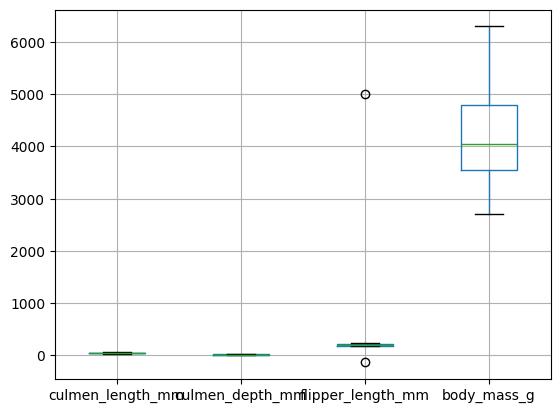

In [ ]:
penguins_df.boxplot()

In [ ]:
penguins_clean = penguins_df[(penguins_df['flipper_length_mm'] < 3000) & (penguins_df ['flipper_length_mm'] > 0)]

In [ ]:
penguins_clean.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,44.022523,17.148649,201.024024,4208.483483
std,5.444308,1.958940,14.042299,805.978992
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4800.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: >

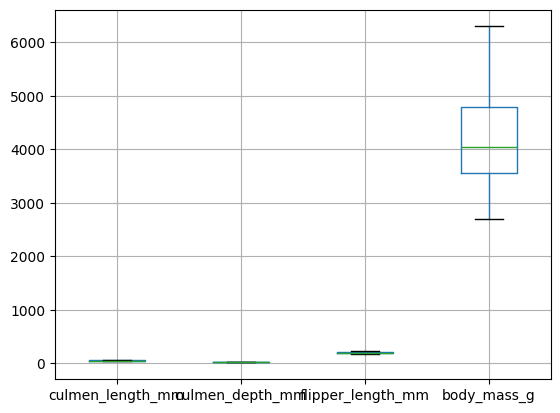

In [ ]:
penguins_clean.boxplot()

#Perform preprocessing steps on the dataset to create dummy variables

In [ ]:
penguins_clean = pd.get_dummies(penguins_clean, drop_first = True)

#Perform preprocessing steps on the dataset - scaling

In [ ]:
scaler = StandardScaler()
penguins_prepocessed = scaler.fit_transform(penguins_clean)

#Perform PCA

In [ ]:
pca = PCA(n_components=None)
pca.fit(penguins_prepocessed)
n_components = sum(pca.explained_variance_ratio_>0.1)

pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_prepocessed)

#Detect the optimal number of clusters for k-means clustering

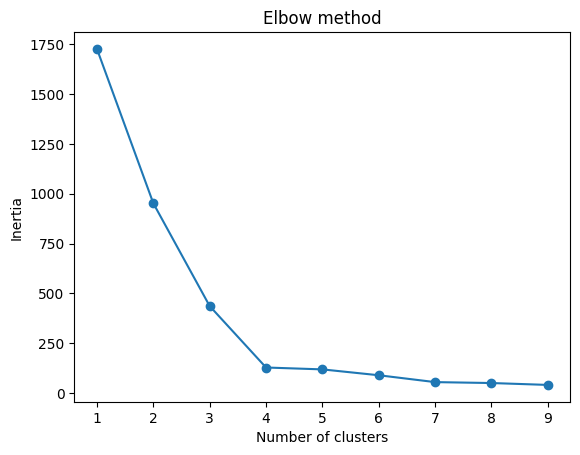

In [ ]:
inertia = []

for k in range(1,10):
  kmeans = KMeans(n_clusters=k , random_state=42).fit(penguins_PCA)
  inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()
n_clusters=4

#Run the k-means clustering algorithm
  

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)

/tmp/ipython-input-2485567719.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


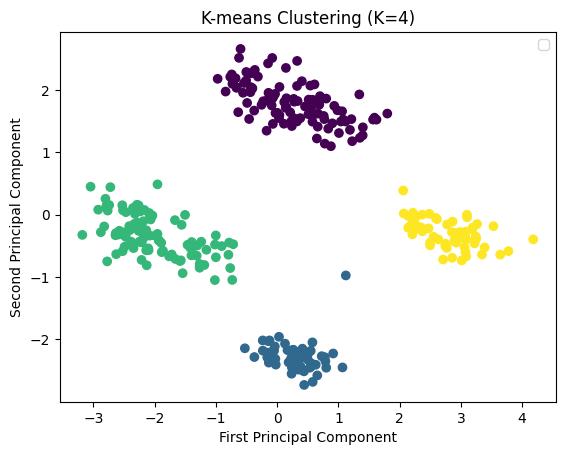

In [ ]:
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

#Create a final statistical DataFrame for each cluster.

In [ ]:
penguins_clean['label'] = kmeans.labels_

numeric_columns = ['culmen_length_mm', 'culmen_depth_mm' , 'flipper_length_mm', 'label']

stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()

stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,label
label,,,,
0,43.878302,19.111321,194.764151,0.0
1,45.545763,14.262712,212.779661,1.0
2,40.217757,17.611215,189.046729,2.0
3,49.473770,15.718033,221.540984,3.0
